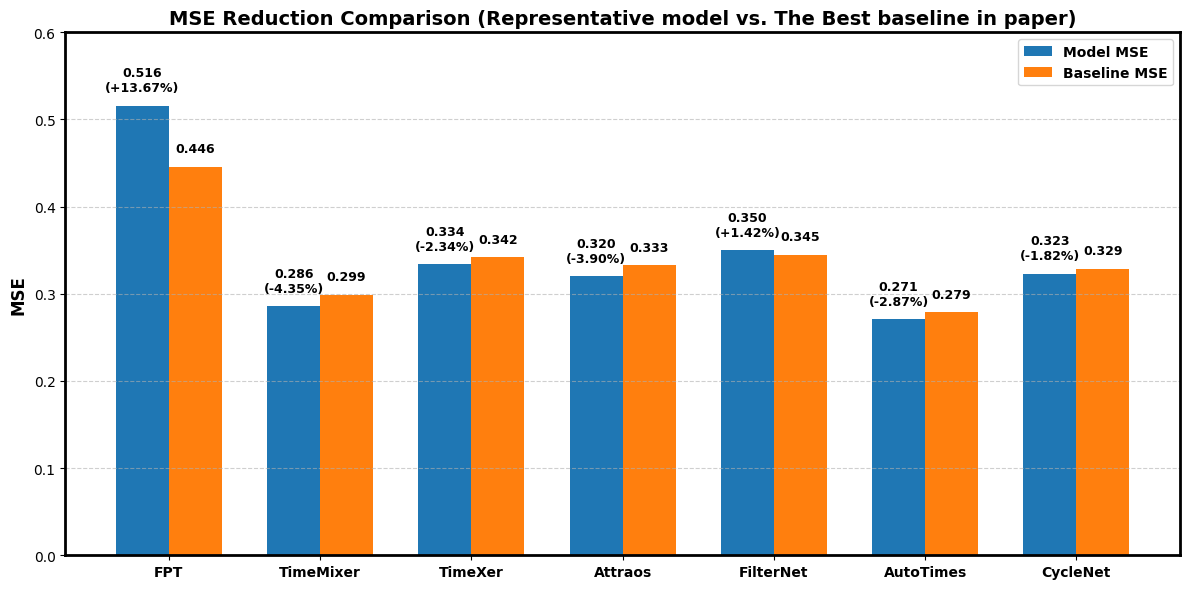

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------
# 1. 数据准备（无 ContiFormer）
# -------------------
models = [
    "FPT", "TimeMixer", "TimeXer", 
    "Attraos", "FilterNet", "AutoTimes", "CycleNet"
]
model_mse = [0.516, 0.286, 0.334, 0.320, 0.350, 0.271, 0.323]
baseline_mse = [0.446, 0.299, 0.342, 0.333, 0.345, 0.279, 0.329]
improvements = [-13.67, 4.35, 2.34, 3.90, -1.42, 2.87, 1.82]

def improvement_label(imp):
    """
    若 imp > 0，则表示模型 MSE 相对 baseline 下降(更好)，标签显示为 (-xx.xx%)；
    若 imp < 0，则表示模型 MSE 上升(更差)，标签显示为 (+xx.xx%)。
    """
    if imp > 0:
        return f"(-{imp:.2f}%)"
    elif imp < 0:
        return f"(+{abs(imp):.2f}%)"
    else:
        return "(0.00%)"

x = np.arange(len(models))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

bars_model = ax.bar(x - bar_width/2, model_mse, 
                    width=bar_width, label='Model MSE', color='#1f77b4')
bars_base = ax.bar(x + bar_width/2, baseline_mse, 
                   width=bar_width, label='Baseline MSE', color='#ff7f0e')

# 向上偏移量，用于避免数值标签和柱顶部重叠
offset = 0.013

# 在柱子上方标注数值
for i, bar in enumerate(bars_model):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,
            height + offset,
            f"{model_mse[i]:.3f}\n{improvement_label(improvements[i])}",
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold')

for i, bar in enumerate(bars_base):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,
            height + offset,
            f"{baseline_mse[i]:.3f}",
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold')

# 设置 X 轴和 Y 轴
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10, fontweight='bold')
ax.set_ylabel('MSE', fontsize=12, fontweight='bold')
ax.set_title('MSE Reduction Comparison (Representative model vs. The Best baseline in paper)', fontsize=14, fontweight='bold')

# 纵轴范围改为 0~0.6
ax.set_ylim(0, 0.6)

# 加粗边框
for spine in ax.spines.values():
    spine.set_linewidth(2.0)

# 添加网格（只对 y 轴）
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

# 图例加粗
legend = ax.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

plt.tight_layout()

# 保存为 PDF 文件（可修改文件名、DPI 等）
plt.savefig("mse_comparison.pdf", format='pdf', dpi=500, bbox_inches='tight')

plt.show()